## 1. Scatter plot 

In [133]:
#Set up
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
import warnings; warnings.filterwarnings(action='once')

In [135]:
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}

In [136]:
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style('white')
%matplotlib inline
#confirm verson
print(mpl.__version__) 
print(sns.__version__) 

3.7.1
0.12.2


/var/folders/r7/v4b_0z3d69n_ggx7tnpbhcg80000gn/T/ipykernel_32849/4140691928.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [5]:
#import dataset
midwest = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv")
midwest

PID     county state   area  poptotal   popdensity  popwhite  popblack  \
0     561      ADAMS    IL  0.052     66090  1270.961540     63917      1702   
1     562  ALEXANDER    IL  0.014     10626   759.000000      7054      3496   
2     563       BOND    IL  0.022     14991   681.409091     14477       429   
3     564      BOONE    IL  0.017     30806  1812.117650     29344       127   
4     565      BROWN    IL  0.018      5836   324.222222      5264       547   
..    ...        ...   ...    ...       ...          ...       ...       ...   
327  3045   WALWORTH    WI  0.032     75000  2343.750000     72747       454   
328  3046   WASHBURN    WI  0.050     13772   275.440000     13585        25   
329  3049    WAUPACA    WI  0.045     46104  1024.533330     45695        22   
330  3050   WAUSHARA    WI  0.037     19385   523.918919     19094        29   
331  3052       WOOD    WI  0.048     73605  1533.437500     72157        90   

     popamerindian  popasian  ...  percprof  poppovertyknown  \
0               98       249  ...  4.355859            63628   
1               19        48  ...  2.870315            10529   
2               35        16  ...  4.488572            14235   
3               46       150  ...  4.197800            30337   
4               14         5  ...  3.367680             4815   
..             ...       ...  ...       ...              ...   
327            201       494  ...  6.082324            71553   
328            122        33  ...  4.022803            13532   
329            125        92  ...  3.138596            44412   
330             70        43  ...  2.620907            19163   
331            481       722  ...  4.583725            72685   

     percpovertyknown  percbelowpoverty  percchildbelowpovert  \
0           96.274777         13.151443             18.011717   
1           99.087145         32.244278             45.826514   
2           94.956974         12.068844             14.036061   
3           98.477569          7.209019             11.179536   
4           82.505140         13.520249             13.022889   
..                ...               ...                   ...   
327         95.404000          9.641804              8.699613   
328         98.257334         15.866095             21.418598   
329         96.330036          8.488697             10.071411   
330         98.854785         13.786985             20.050708   
331         98.750085          8.525831             11.162997   

     percadultpoverty  percelderlypoverty  inmetro  category    dot_size  
0           11.009776           12.443812        0       AAR  250.944411  
1           27.385647           25.228976        0       LHR  185.781260  
2           10.852090           12.697410        0       AAR  175.905385  
3            5.536013            6.217047        1       ALU  319.823487  
4           11.143211           19.200000        0       AAR  130.442161  
..                ...                 ...      ...       ...         ...  
327         10.926610            6.894182        0       AAR  387.490366  
328         13.642483           14.329455        0       AAR  124.233095  
329          6.953799           10.338641        0       AAR  219.578698  
330         11.695784           11.804558        0       AAR  155.859825  
331          7.375656            7.882918        0       AAR  284.352704  

[332 rows x 29 columns]

In [14]:
# create the same amount of color as the unique midwest['category']
n_category=np.unique(midwest['category'])
n_category

array(['AAR', 'AAU', 'AHR', 'ALR', 'ALU', 'HAR', 'HAU', 'HHR', 'HLR',
       'HLU', 'LAR', 'LAU', 'LHR', 'LHU'], dtype=object)

In [11]:
colors = [plt.cm.tab10(i/float(len(n_category)-1)) for i in range(len(n_category))]

/var/folders/r7/v4b_0z3d69n_ggx7tnpbhcg80000gn/T/ipykernel_30156/429636147.py:4: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter('area','poptotal',


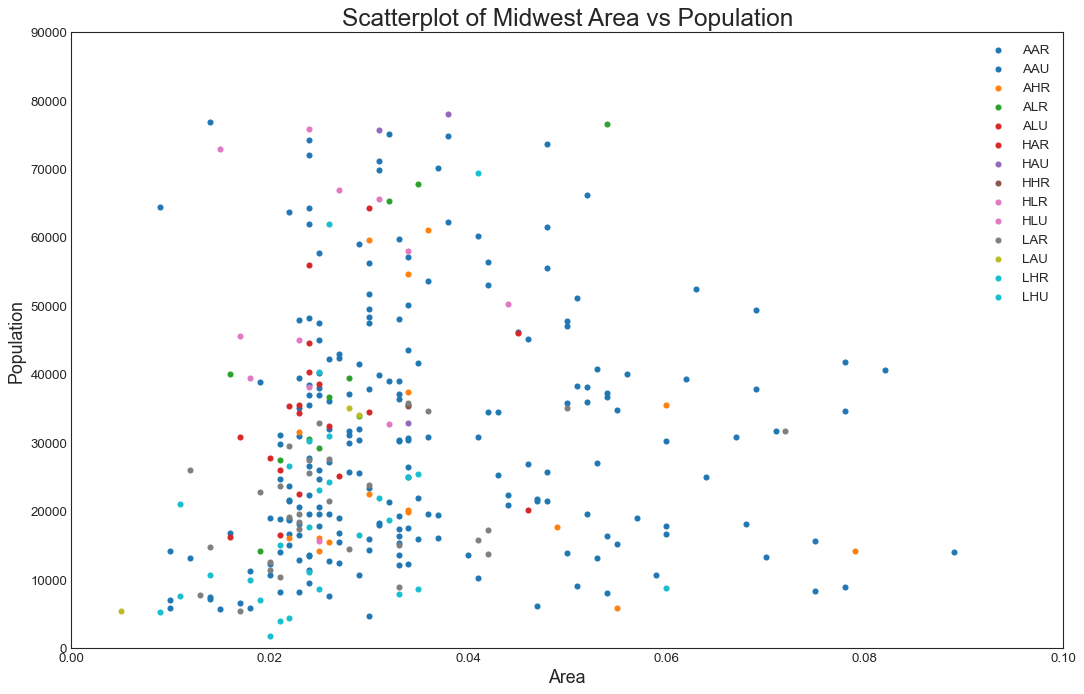

In [15]:
# Draw plot for each category 
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
for i, category in enumerate(n_category):
    ##(x,y,data=...)
    plt.scatter('area','poptotal',
               data=midwest.loc[midwest.category==category,:],
               s=20,c=colors[i],label=str(category))
# Decorations
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Scatterplot of Midwest Area vs Population", fontsize=22)
plt.legend(fontsize=12)    
plt.show()     

## 2. Bubble plot with Encircling 

In [5]:
from matplotlib import patches
from scipy.spatial import ConvexHull
import warnings; warnings.simplefilter('ignore')
sns.set_style('white')

In [7]:
#load data (still midwest)
midwest=pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv')
#load as many colors as there are unique midwest['category']
categories=np.unique(midwest['category'])
colors=[plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

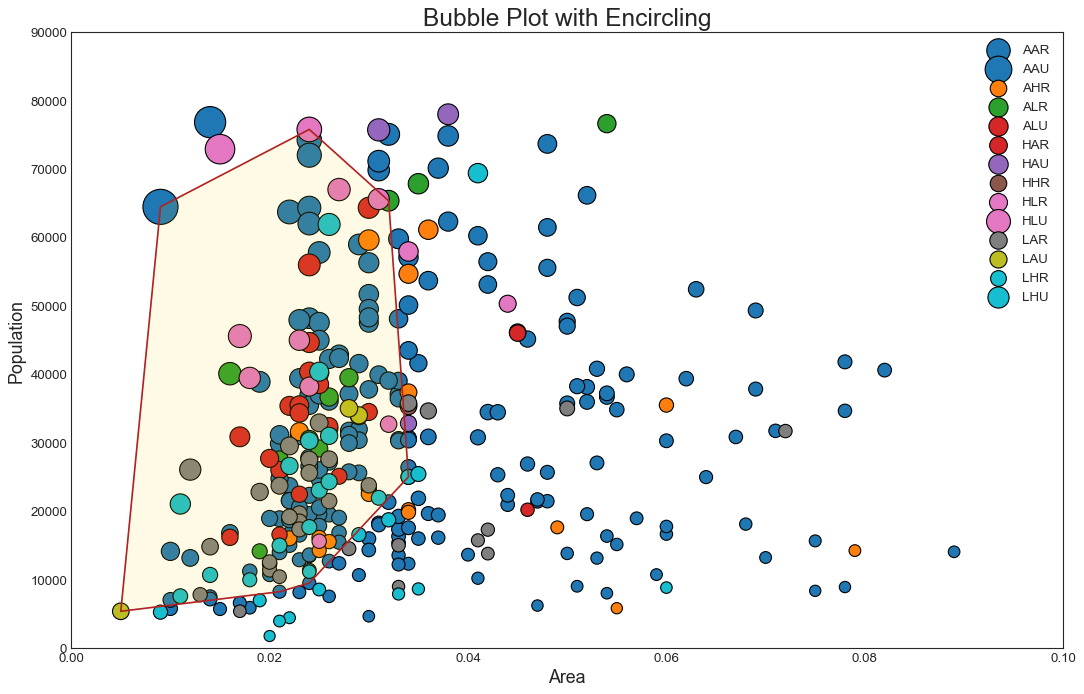

In [20]:
#draw scatterplot with unique color for each category
fig=plt.figure(figsize=(16,10),dpi=80,facecolor='w',edgecolor='k')
for i,category in enumerate(categories):
    plt.scatter('area','poptotal',data=midwest.loc[midwest.category==category,:],s='dot_size',
              c=colors[i],label=str(category),edgecolors='black')

##########################################################
##########################################################
#KEY STEP###Encircling####
def encircle(x,y,ax=None,**kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull=ConvexHull(p)
    poly=plt.Polygon(p[hull.vertices,:],**kw)
    ax.add_patch(poly)
#select data to be encircled
midwest_encircle_data=midwest.loc[midwest.state=='IN',:]

#draw polygon surrounding vertices
encircle(midwest_encircle_data.area,midwest_encircle_data.poptotal,ec='k',fc='gold',alpha=0.1)
encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal, ec="firebrick", fc="none", linewidth=1.5)

##########################################################
########################################################
#Decorations
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Bubble Plot with Encircling", fontsize=22)
plt.legend(fontsize=12)    
plt.show() 



## 3.1 Scatter plot with linear regression line of best fit

In [ ]:
## seaborn.lmplot method is used to plot data and regreesion model

In [138]:
#import data
df=pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")
data=df.loc[df.cyl.isin([4,8]),:]
##notice: isin[], contain 4 or 8

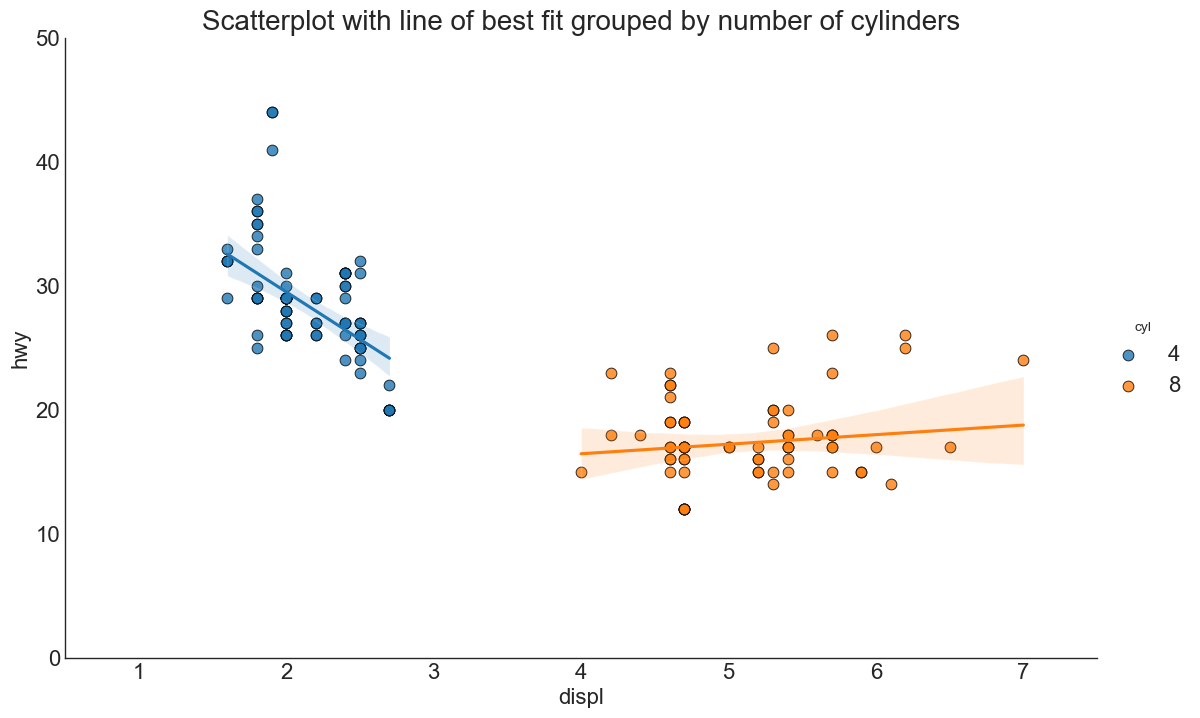

In [146]:
#plot
sns.set_style('white')
gridobj=sns.lmplot(data=data,x='displ',y='hwy',hue='cyl', ##hue used to group data
                  height=7,aspect=1.6,robust=True,palette='tab10',
                  scatter_kws=dict(s=60,linewidths=.7,edgecolors='black'))

#Decorations
gridobj.set(xlim=(0.5,7.5),ylim=(0,50))
plt.title('Scatterplot with line of best fit grouped by number of cylinders',fontsize=20)
plt.show()
##note 为什么不是完整的直线？？！

## 3.2  Each regression line in its own column

In [17]:
# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")
df_select = df.loc[df.cyl.isin([4,8]), :]


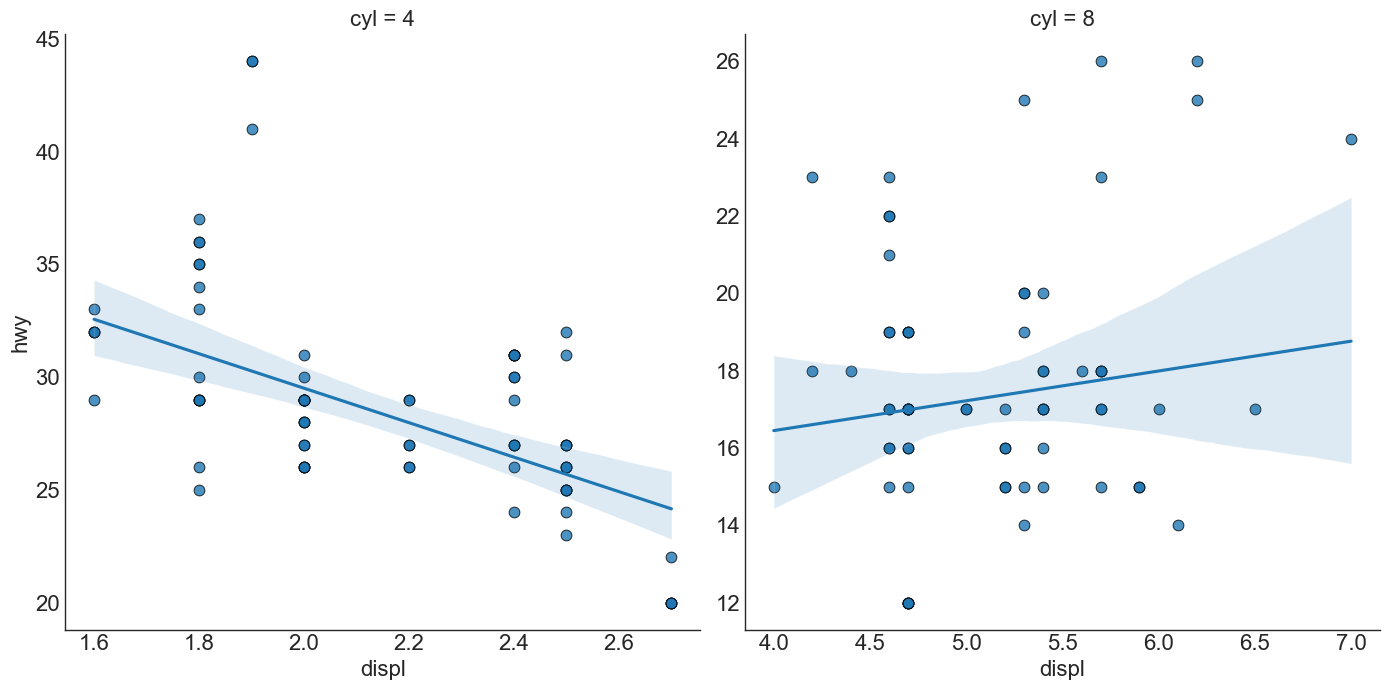

In [142]:
#Two seperate graphs of linear regression
sns.set_style('white')
gridobj=sns.lmplot(data=df_select,
                   x='displ',
                   y='hwy',
                   height=7,
                   robust=True,
                   palette='Set1',
                   col='cyl',
                   scatter_kws=dict(s=60,linewidths=.7,edgecolors='black'),
                  facet_kws=dict(sharex=False, sharey=False))


# Decorations
# gridobj.set(xlim=(0.5, 7.5), ylim=(0, 50))
# plt.show()


## 4. Jittering with stripplot
to avoid multiple points get plotted over each other, jitter the points

In [ ]:
## seaborn.stripplot method 

In [14]:
# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")
df

manufacturer   model  displ  year  cyl       trans drv  cty  hwy fl  \
0           audi      a4    1.8  1999    4    auto(l5)   f   18   29  p   
1           audi      a4    1.8  1999    4  manual(m5)   f   21   29  p   
2           audi      a4    2.0  2008    4  manual(m6)   f   20   31  p   
3           audi      a4    2.0  2008    4    auto(av)   f   21   30  p   
4           audi      a4    2.8  1999    6    auto(l5)   f   16   26  p   
..           ...     ...    ...   ...  ...         ...  ..  ...  ... ..   
229   volkswagen  passat    2.0  2008    4    auto(s6)   f   19   28  p   
230   volkswagen  passat    2.0  2008    4  manual(m6)   f   21   29  p   
231   volkswagen  passat    2.8  1999    6    auto(l5)   f   16   26  p   
232   volkswagen  passat    2.8  1999    6  manual(m5)   f   18   26  p   
233   volkswagen  passat    3.6  2008    6    auto(s6)   f   17   26  p   

       class  
0    compact  
1    compact  
2    compact  
3    compact  
4    compact  
..       ...  
229  midsize  
230  midsize  
231  midsize  
232  midsize  
233  midsize  

[234 rows x 11 columns]

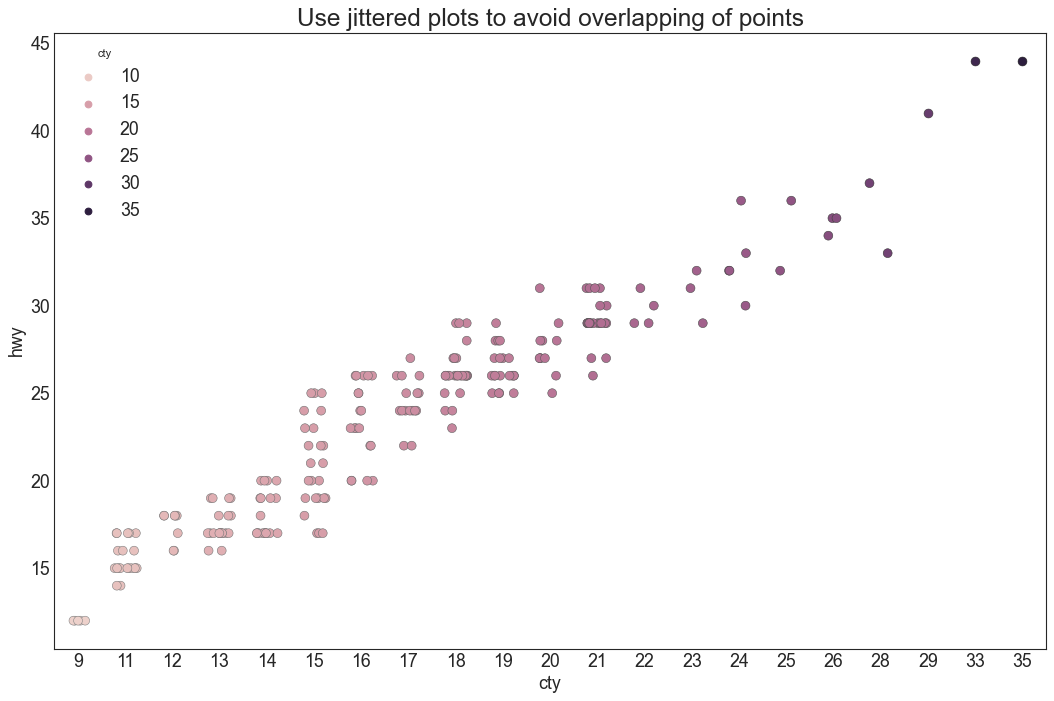

In [148]:
# Draw stripplot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.stripplot(df,x=df.cty, y=df.hwy, jitter=0.25, size=8, ax=ax, linewidth=.5,hue='cty')

# Decorations
plt.title('Use jittered plots to avoid overlapping of points', fontsize=22)
plt.show()


## 6. Marginal Histogram
often used in EDA

/var/folders/r7/v4b_0z3d69n_ggx7tnpbhcg80000gn/T/ipykernel_32849/1057628195.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_main.set_xticklabels(xlabels)


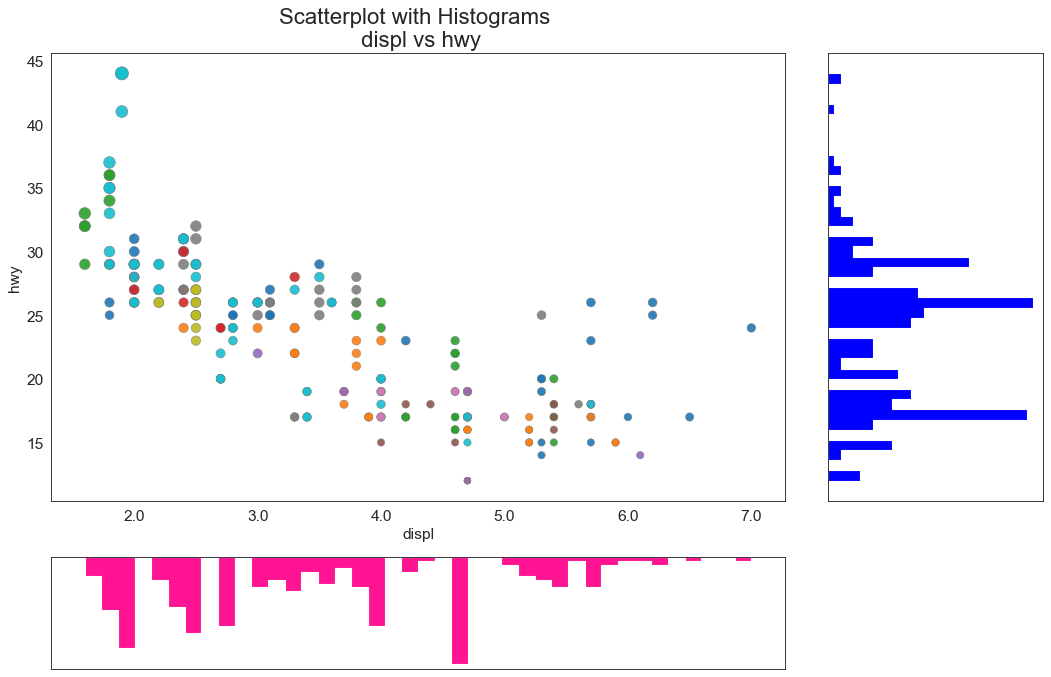

In [117]:
#load data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")
#create Fig and gridspec
fig=plt.figure(figsize=(16,10),dpi=80)
grid=plt.GridSpec(4,4,hspace=0.5,wspace=0.2)
#define the axes
ax_main=fig.add_subplot(grid[:-1,:-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])
#scatterplot on main ax
ax_main.scatter('displ','hwy',s=df.cty*4,c=df.manufacturer.astype('category').cat.codes,alpha=0.9,data=df,cmap="tab10", edgecolors='gray', linewidths=.5)


#histogram on the right
ax_bottom.hist(df.displ,40,histtype='stepfilled',orientation='vertical',color='deeppink')

#histogram in the bottom
ax_right.hist(df.hwy,40,histtype='stepfilled',orientation='horizontal',color='blue')
ax_bottom.invert_yaxis()
# Decorations
ax_main.set(title='Scatterplot with Histograms \n displ vs hwy', xlabel='displ', ylabel='hwy')
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

xlabels = ax_main.get_xticks().tolist()
ax_main.set_xticklabels(xlabels)
plt.show()



## 7. Marginal Boxplot
pinpoint the median, 25th and 75th percentile of X and Y


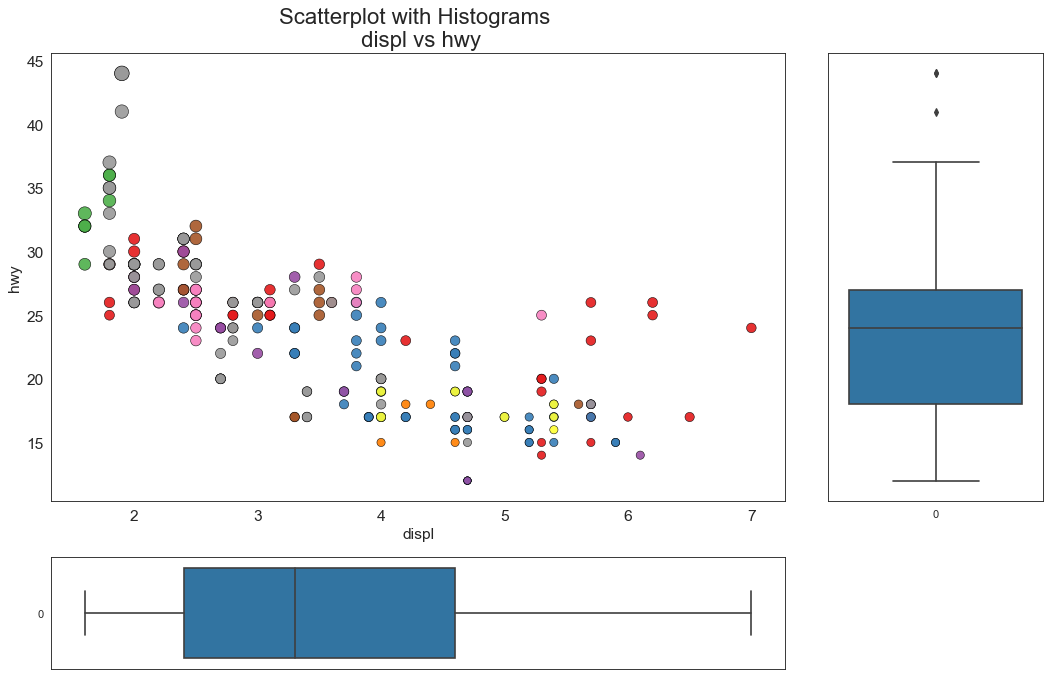

In [123]:
#load the data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")

# Create Fig and gridspec
fig = plt.figure(figsize=(16, 10), dpi= 80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)
# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])
# Scatterplot on main ax
ax_main.scatter('displ', 'hwy', s=df.cty*5, c=df.manufacturer.astype('category').cat.codes, alpha=.9, data=df, cmap="Set1", edgecolors='black', linewidths=.5)

#add a graph in each part
sns.boxplot(df.hwy,ax=ax_right,orient='v')
sns.boxplot(df.displ,ax=ax_bottom,orient='h')


# Decorations 
# Remove x axis name for the boxplot
ax_bottom.set(xlabel='')
ax_right.set(ylabel='')

# Main Title, Xlabel and YLabel
ax_main.set(title='Scatterplot with Histograms \n displ vs hwy', xlabel='displ', ylabel='hwy')

# Set font size of different components
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

plt.show()


## 8. Correllogram
visually see the correlatoin metric between all possible pairs 
sns.heatmap function

In [124]:
#load data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")


/var/folders/r7/v4b_0z3d69n_ggx7tnpbhcg80000gn/T/ipykernel_32849/1488001711.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),xticklabels=df.corr().columns,yticklabels=df.corr().columns,


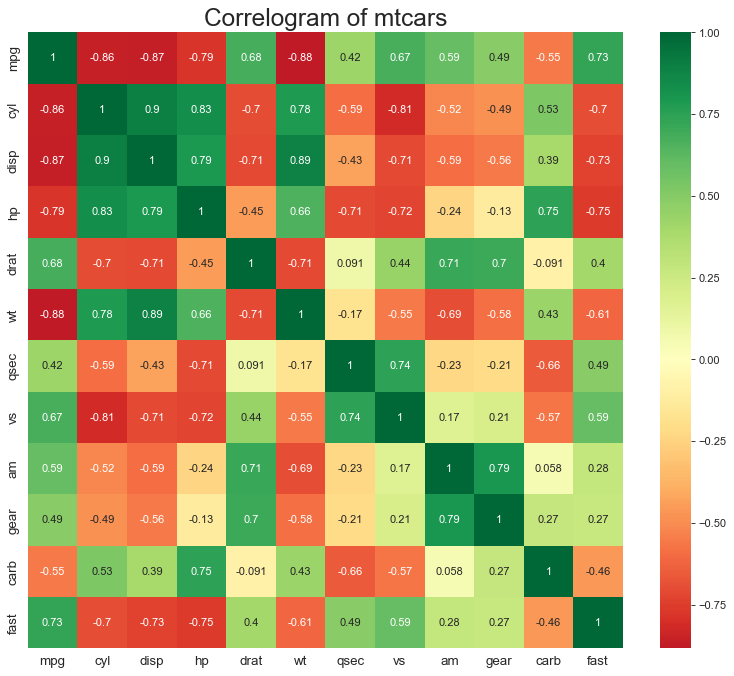

In [127]:
#graph
plt.figure(figsize=(12,10),dpi=80)
sns.heatmap(df.corr(),xticklabels=df.corr().columns,yticklabels=df.corr().columns,
           cmap='RdYlGn',center=0,annot=True)

#decorations
plt.title('Correlogram of mtcars',fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## 9. Pairwise plot
- understand the relationship bewteen all possible pairs
- birariate analysis

<Figure size 800x640 with 0 Axes>

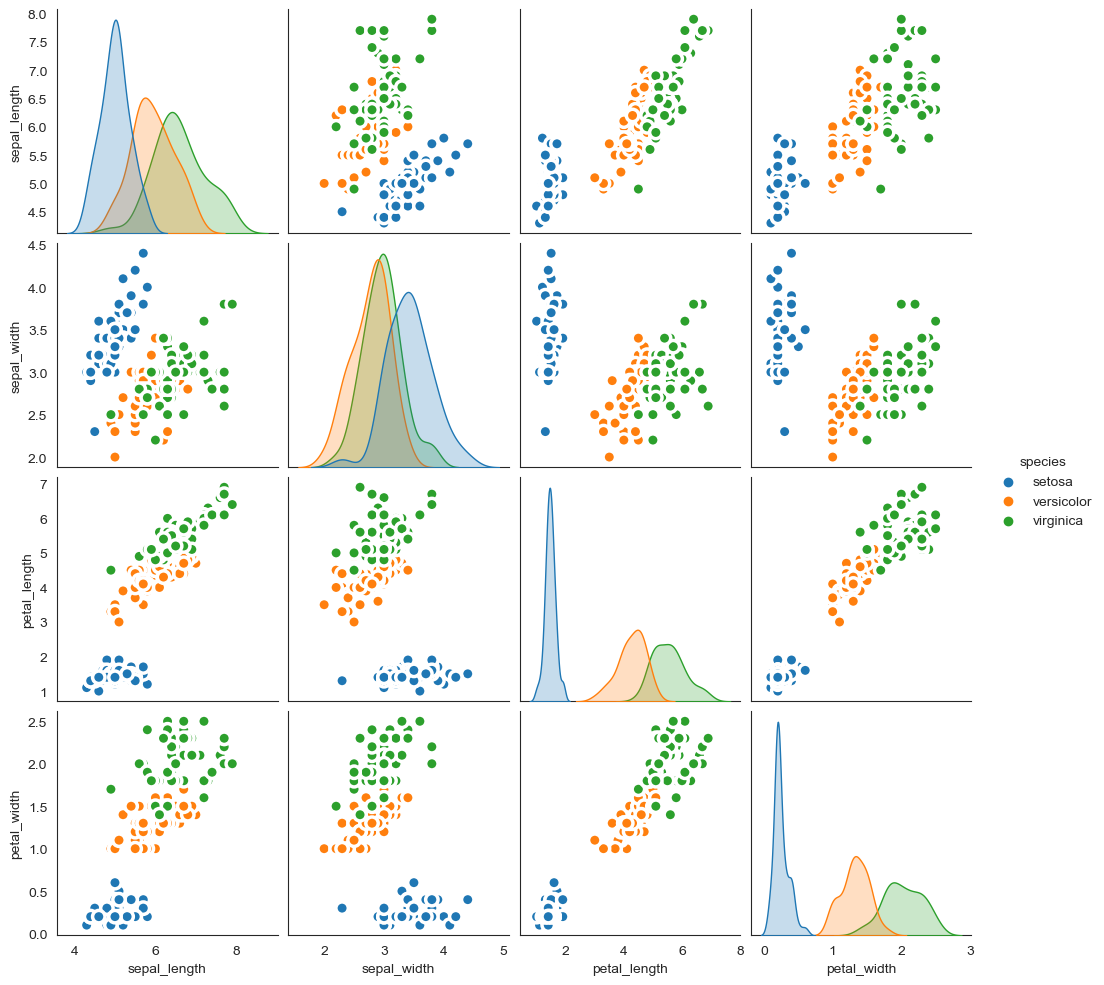

In [128]:
## load the data
df=sns.load_dataset('iris')
#plot
plt.figure(figsize=(10,8),dpi=80)
sns.pairplot(df,kind='scatter',hue='species',plot_kws=dict(s=80,
                                                           edgecolor='white',linewidth=2.5))
plt.show()